# Importing the data
Just a quick check to see whether we can import all the data

In [1]:
import tmd
from tmd.view import plot
from tmd.view import view

import matplotlib.pyplot as plt
import sys
import os

In [2]:
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

In [3]:
import functions as fcts

In [4]:
data_folder = "../Data/ExamplesL23PC"
folders_to_treat = ['Human','Mouse']

In [5]:
grouped_neurons = fcts.check_and_load_neurons(data_folder, folders_to_treat)

Folder: Human
Neurons loaded: 186
Total files in folder: 187
.asc files in folder: 186
Failed to load: 0 files
Unloaded files: []

Folder: Mouse
Neurons loaded: 38
Total files in folder: 39
.asc files in folder: 38
Failed to load: 0 files
Unloaded files: []



In [6]:
neurons_human = grouped_neurons["Human"]
neurons_mouse = grouped_neurons["Mouse"]

# Checking the average diagram of Axons

## New method: selecting only a subsample of axons

In [7]:
population_human = tmd.Population.Population(name='Humans', neurons=neurons_human)
population_mouse = tmd.Population.Population(name='Mice', neurons=neurons_mouse)

In [8]:
phs_human = [
    tmd.methods.get_persistence_diagram(n.axon[0])
    for n in population_human.neurons
    if len(n.axon) > 0
]

phs_human_select = [p for p in phs_human if len(p) > 20]

In [12]:
len(phs_human)

128

(array([[3.58695506e-06, 3.87843438e-06, 4.16359493e-06, ...,
         5.66103100e-06, 5.59291785e-06, 5.52586993e-06],
        [3.65390923e-06, 3.96355741e-06, 4.26883314e-06, ...,
         5.68840994e-06, 5.62161780e-06, 5.55609444e-06],
        [3.69804912e-06, 4.02386802e-06, 4.34755670e-06, ...,
         5.71788056e-06, 5.65261171e-06, 5.58879120e-06],
        ...,
        [7.09267123e-06, 7.12535834e-06, 7.14567630e-06, ...,
         1.15578437e-06, 1.12397524e-06, 1.09081285e-06],
        [7.09071352e-06, 7.11739129e-06, 7.13151705e-06, ...,
         1.08361930e-06, 1.05477901e-06, 1.02473874e-06],
        [7.07674013e-06, 7.09752417e-06, 7.10565380e-06, ...,
         1.01423949e-06, 9.88113252e-07, 9.60940682e-07]]),
 (<Figure size 640x480 with 1 Axes>,
  <Axes: title={'center': 'Average persistence image'}, xlabel='End radial distance', ylabel='Start radial distance'>))

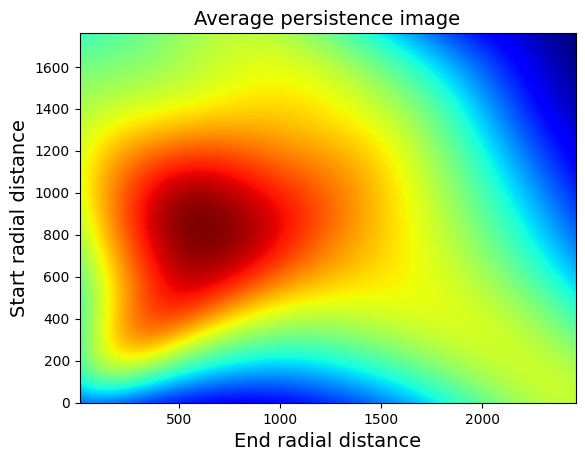

In [9]:
plot.persistence_image_average(phs_human)